In [1]:
import meshposition as mp
import utils as utl
import numpy as np
import matplotlib.pyplot as plt
import analyse_utils as atl

mp.init()

====> 'D:\Dev\uwb\server_mesh_position\py_serial\serial_topic_json.py' started logging with level 'Info' @ '2021-07-18 14:09:25.010982'


checking file './config_ryzen.json'
loading:  ./config_ryzen.json


logging in file 'log/serial-2021.07.18.log'
====> 'D:\Dev\uwb\server_mesh_position\py_serial\meshposition.py' started logging with level 'Info' @ '2021-07-18 14:09:25.258017'
uart> device with serial 000760130125 found at COM34
uart> COM34 : is Open


mp>getting config
checking file './config_ryzen.json'
loading:  ./config_ryzen.json
{'Tag': '90A971A3D1A1B648', 'FrontRight': '98501ED22B42EB41', 'FrontLeft': 'E8D81FEE52C283EB', 'RearLeft': 'C24FD51212E905F0', 'RearRight': '530BE91D3559D690', 'TestInit': 'CBC216DC164B1DE8', 'TestResp': '1CF6567337562176'}
mp>starting serial
mp>start serial parsing


databases available from https://www.homesmartmesh.com/docs/networks/ultrawideband/#database

In [2]:
node_ids = mp.rf_get_active_short_ids()
print(node_ids)
utl.save_json_timestamp("config",node_ids)

(Tag) : (2)/(90A971A3D1A1B648)
(TestInit) : (1)/(CBC216DC164B1DE8)
(TestResp) : (0)/(1CF6567337562176)
{'Tag': {'sid': 2, 'uid': '90A971A3D1A1B648'}, 'TestInit': {'sid': 1, 'uid': 'CBC216DC164B1DE8'}, 'TestResp': {'sid': 0, 'uid': '1CF6567337562176'}}


In [24]:
n_init = node_ids["TestInit"]["sid"]
n_resp = node_ids["TestResp"]["sid"]
n_tag = node_ids["Tag"]["sid"]

diag_list = mp.get_list_uwb_ping_diag([(n_init,n_resp),(n_init,n_tag)], 100)

db_uwb_ping_diag> Skipping sequence 28 due to missing responses
db_uwb_ping_diag> Skipping sequence 48 due to missing responses
db_uwb_ping_diag> (98)/(100)


In [27]:
utl.save_json_timestamp("ping_diag_3_nodes",diag_list)

'./test_db/ping_diag_3_nodes 2021.07.18 16-33-05.json'

In [25]:
atl.set_data_list(diag_list)
print(f"lodaded {len(diag_list)} entries")

lodaded 197 entries


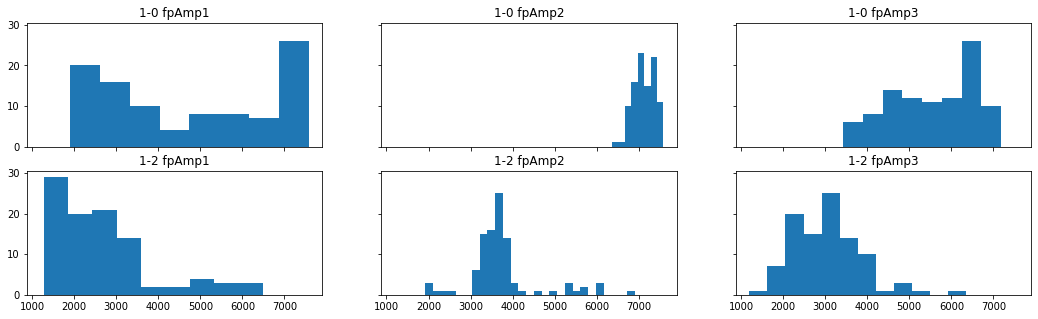

In [28]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

atl.plot_axis_param("fpAmp1",n_init,n_resp,axs[0,0])
atl.plot_axis_param("fpAmp2",n_init,n_resp,axs[0,1])
atl.plot_axis_param("fpAmp3",n_init,n_resp,axs[0,2])

atl.plot_axis_param("fpAmp1",n_init,n_tag,axs[1,0])
atl.plot_axis_param("fpAmp2",n_init,n_tag,axs[1,1])
atl.plot_axis_param("fpAmp3",n_init,n_tag,axs[1,2])

fig.set_size_inches(18,5)

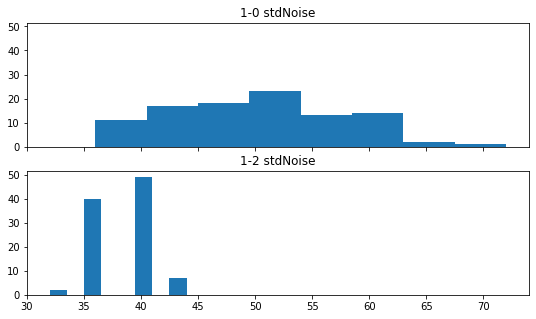

In [29]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

atl.plot_axis_param("stdNoise",n_init,n_resp,axs[0])
atl.plot_axis_param("stdNoise",n_init,n_tag,axs[1])

fig.set_size_inches(9,5)

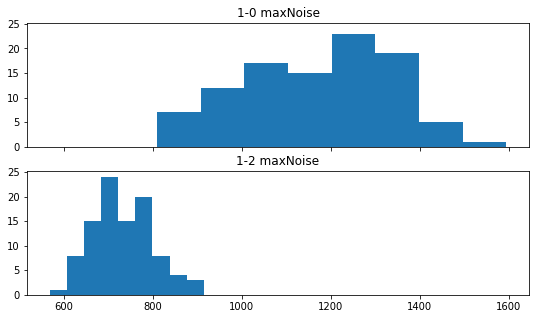

In [30]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

atl.plot_axis_param("maxNoise",n_init,n_resp,axs[0])
atl.plot_axis_param("maxNoise",n_init,n_tag,axs[1])

fig.set_size_inches(9,5)

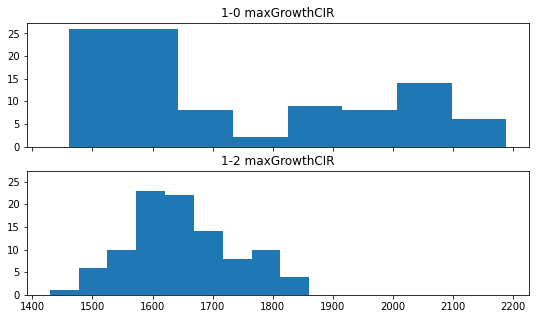

In [31]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

atl.plot_axis_param("maxGrowthCIR",n_init,n_resp,axs[0])
atl.plot_axis_param("maxGrowthCIR",n_init,n_tag,axs[1])

fig.set_size_inches(9,5)

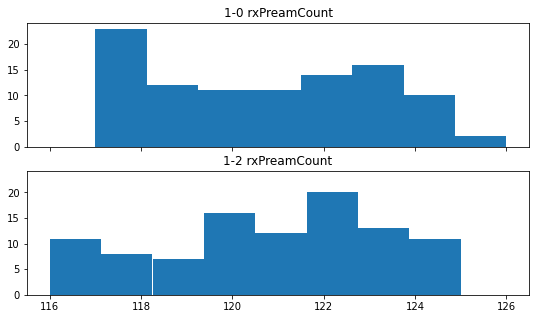

In [32]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

atl.plot_axis_param("rxPreamCount",n_init,n_resp,axs[0])
atl.plot_axis_param("rxPreamCount",n_init,n_tag,axs[1])

fig.set_size_inches(9,5)